# Індивідуальна робота. Трансформування й підготовка даних для прогнозування цін на житло

## Загальна частина

### 1. Постановка задачі 

У сучасному, прогресивному світі найбільшою цінністю користуються дані. Вони нагромаджуються з неймовірною швидкістю, кожного дня до баз даних по усьому світі надходять терабайти інформації. Великі компанії готові платити значні суми лише за отримання цих баз даних, дані стали своєрідною валютою сучасного світу, а за правильної інтерпретації, аналізу й використання вони здатні перетворюватись на реальні гроші. Економіка держави не є винятком. Фінансовий, банківський сектори, логістична, інвестиційна, бухгалтерська практики продукують величезні обсяги даних, які за правильного підходу можна використовувати на користь не тільки окремих компаній і підприємств, а і держави в цілому. В таких умовах актуальним є питання швидкої, продуктивної та якісної обробки й аналізу цих даних й, як результат, отримання правильних висновків і результатів, на основі яких будуть прийматись подальші рішення та будуватись стратегія. Сектор нерухомості, як в Україні та і у світі в цілому, є одним із секторів з найбільшою капіталізацією, починають інвестуватися нові будівельні проекти, через ринок нерухомості проходять тисячі об’єктів й укладаються відповідні угоди. Аналіз, моделювання й прогнозування цін об’єктів на ринку нерухомості сприятиме прийняттю правильних й найбільш вигідних рішень й укладанню відповідних угод. А у розрізі того, що обсяг використовуваних даних великий, є необхідність їх обробки із застосуванням комп’ютерних систем і технологій, зокрема методів машинного навчання, що дозволить якісно, а головне швидко й ефективно оброблювати отримані дані.

### 3. Опис набору даних

База даних складається з об’єктів нерухомості невеликого містечка, населенням близько 50 тис. жителів та розташуванням відносно далеко від великих центрів. У містечку переважає приватна забудова, поверховість у більшості випадків складає до двох поверхів. База данихскладається з двох частин, об’ємом приблизно 1300 рядків на 90 стовпчиків загалом. Поділ на частини відбувається порівну: половина рядків знаходиться в першій частині, інша – в другій, обидві частини мають однакові поля (стовпці). «Ціна продажі» виступає цільвою змінною.

Набір даних доступний за посиланням https://www.kaggle.com/c/5407/download-all.

## Технічна частина

### 1. Імпортуємо необхідні бібліотеки

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy.stats import norm, skew #for some statistics
from scipy import stats

### 2. Завантажуємо дані

Завантажуємо необхідний дата сет за посиланням https://www.kaggle.com/c/5407/download-all та разархівовуємо його

In [2]:
import zipfile

path_to_zip_file = "C:/Users/Julia/Desktop/LabsPython/house-prices-dataset.zip"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

Перевіряємо наявність необхідних даних в директорії

In [3]:
import os

path = "C:/Users/Julia/Desktop/LabsPython/"

with os.scandir(path) as listOfEntries:
    for entry in listOfEntries:
        print(entry.name)

.ipynb_checkpoints
data_description.txt
house-prices-dataset.zip
PythonNotebook.ipynb
sample_submission.csv
test.csv
train.csv


### 3. Code Book

Набір даних описує продаж приватної житлової нерухомості в Амесі, штат Айова з 2006 по 2010 рік. Дані були зібрані Діном Де Коком для використання у сфері data science. Повний опис дослідження можна знайти за посиланням - http://jse.amstat.org/v19n3/decock.pdf

Набір даних містить 2930 спостережень та велику кількість пояснювальних змінних (23 номінальних, 23 порядкових, 14 дискретних та 20 безперервних) в оцінці ціни на нерухомість.

#### Опис атрибутів

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

В кінцевому наборі даних (tidy dataset) будуть усі вищеперераховані трансформавані атрибути, готові для подальшого прогнозування.

### 4. Підготовка даних

Помістимо тренувальний та тестовий датасети у pandas дата фрейми

In [4]:
train = pd.read_csv('C:/Users/Julia/Desktop/LabsPython/train.csv')
test = pd.read_csv('C:/Users/Julia/Desktop/LabsPython/test.csv')

Виведемо перші п'ять рядів тренувального датасету.

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Виведемо перші п'ять рядів тестового датасету.

In [6]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Перевіримо розмірність даних

In [7]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


Зберігаємо стовпчик 'Id'

In [8]:
train_ID = train['Id']
test_ID = test['Id']

Видалемо стовпчик 'Id', так як він не несе необхідної інформації для прогнозування

In [9]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Перевіримо знову розмірність даних після видалення змінної 'Id'

In [10]:
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


#### Викиди

Побудуємо графік залежності ціни від площу та первіримо на наявність викидів у тренувальних даних.

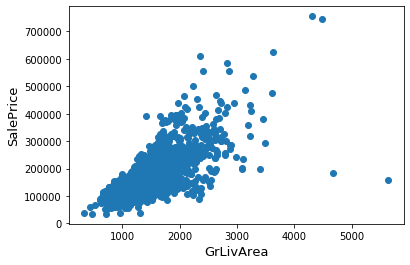

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Ми бачимо внизу праворуч два викиди з великими GrLivArea, які мають низьку ціну за відносно велику площу. Тож, в даному випадку, можемо їх безпечно видалити.

Видаляємо викиди.

In [12]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Побудуємо графік без викидів

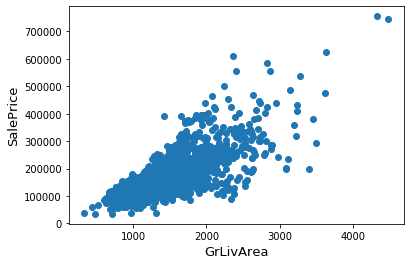

In [13]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### Цільва змінна

SalePrice - змінна, яку ми будемо передбачати. Тож, бажано спочатку зробити деякий аналіз цієї змінної.

Порівняємо наш ряд з тренувального датасету з нормальним розподілом


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

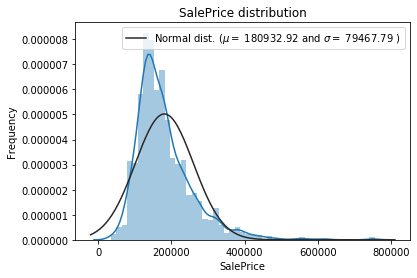

In [14]:
sns.distplot(train['SalePrice'] , fit=norm);

#Обчислимо параметри mu та sigma
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Завершимо графік розподілу
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Також побудуємо графік ймовірностей (QQ-plot)

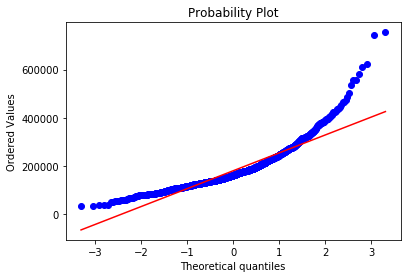

In [15]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Бачимо, що цільова змінна моє скіс праворуч. Оскільки (лінійні) моделі люблять нормально розподілені дані, нам потрібно нормалізувати цю змінну.

#### Логарифмічне пертворення цільової змінної


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

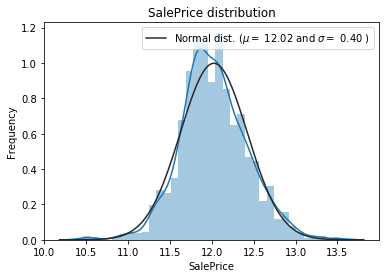

In [16]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Порівняємо ряд з нормальним розподілом
sns.distplot(train['SalePrice'] , fit=norm);

#Обчислимо параметри mu та sigma
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Завершимо графік розподілу
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Також знову побудуємо графік порівняння ймовірностей (QQ-plot)

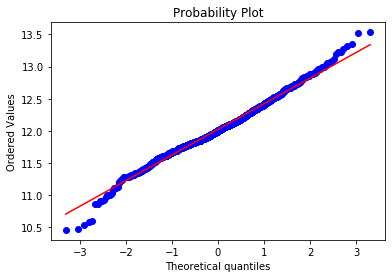

In [17]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

З графіків видно, що дані здаються більш нормально розподіленими.

#### Дослідження атрибутів

Спершу об`єднаємо тестовий та тренувальний дата сети в один дата фрейм

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


#### Пропущені значення

Обчислимо відсоток пропущених значень по кожній змінній

In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


#### Імітація пропущених значень

Присвоїмо пропущеним значенням дані відповідно до іхнього формату

PoolQC: в описі даних говориться, що NA означає "Без басейну". Це має сенс, враховуючи відсоток пропущених значень (+99%) і більшість будинків взагалі не мають басейну.

In [20]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

MiscFeature: в описі даних йдеться про те, що NA означає "MiscFeature відсутня"

In [21]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

Alley: в описі даних говориться, що NA означає "немає доступу до алеї"

In [22]:
all_data["Alley"] = all_data["Alley"].fillna("None")

Fence: в описі даних йдеться про те, що NA означає "немає забору"

In [23]:
all_data["Fence"] = all_data["Fence"].fillna("None")

FireplaceQu: в описі даних говориться, що NA означає "немає каміна"

In [24]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

LotFrontage: Оскільки площа кожної вулиці, пов’язаної з будинком, найімовірніше, має схожу площу з іншими будинками в її околицях, ми можемо заповнити пропущені значення середнім значенням LotFrontage мікрорайону.

In [25]:
#Згрупуємо за мікрорайоном та заповнимо пропущені значення середнім LotFrontage усього району
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual та GarageCond: заміна відсутніх даних на None

In [26]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea та GarageCars: Заміна відсутніх даних на 0 (Оскільки в такому гаражі немає гаражу = немає автомобілів.)

In [27]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

ВsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath та BsmtHalfBath: відсутні значення, ймовірно, дорівнюють нулю.

In [28]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 та BsmtFinType2: Для всіх цих категорій, пов'язаних з підвалом, NaN означає, що підвалу немає.

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

MasVnrArea та MasVnrType: NA, швидше за все, не означає, що даної змінної немає для цих будинків. Ми можемо заповнити 0 для області та None для типу.

In [30]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (Загальна класифікація зонування): "RL" - це, безумовно, найбільш поширене значення. Таким чином, ми можемо заповнити пропущені значення "RL"

In [31]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

Utilities: для цієї категоричної функції всі записи "AllPub", крім одного "NoSeWa" та 2 NA. Оскільки будинок з «NoSewa» знаходиться у навчальному наборі, ця функція не допоможе в прогнозуванні моделювання. Тоді ми можемо безпечно її зняти.

In [32]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional: опис даних говорить, що NA означає типове

In [33]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical: Він має одне значення NA. Оскільки ця функція має здебільшого "SBrkr", ми можемо встановити її для відсутнього значення.

In [34]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

KitchenQual: Лише одне значення NA і те саме, що Електричне, ми встановлюємо "TA" (що є найчастішим) для відсутнього значення в KitchenQual.

In [35]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd: Знову обидва зовнішні 1 і 2 мають лише одне відсутнє значення. Ми просто підставимо в найпоширеніший рядок

In [36]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

SaleType: Заповнимо ще раз найчастіше, який є "WD"

In [37]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

MSSubClass: Na, швидше за все, означає, що немає будівельного класу. Ми можемо замінити пропущені значення на None

In [38]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Знову обчислимо відсоток пропущених значень по кожній змінній

In [39]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Пропущених значень немає.

#### Перетворення деяких змінних типу numerical на categorical

In [40]:
#MSSubClass = клас будівлі
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

Зміна типу TotalCond на categorical

In [41]:
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

Рік і місяць продажі перетворимо на categorical.

In [42]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#### Кодування лейбів деяких атрибутів типу categorical, які можуть містити інформацію в їх наборі

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [55]:
#оброблення атрибутів типу categorical за допомогою LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

#Форма       
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 220)


#### Створення новго атрибуту

Оскільки особливості, пов'язані з площею, дуже важливі для визначення цін на будинки, ми додамо ще одну змінну - загальну площу підвалу, площі першого та другого поверху кожного будинку

In [45]:
#додамо новий атрибут TotalSF
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### Викривлені атрибути

In [46]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Перевірка викривлених числових атрибутів
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


#### Box Cox Transformation атрибутів з високим викривленням

Використаємо scipy функцію boxcox1p, яка обчислює перетворення Box-Cox 1+x.

Параметр λ = 0 еквівалентний log1p, який ми використовували вище для нормалізації цільової змінної.

In [47]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


#### Отримання фіктивних атрибутів типу categorical

In [48]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


Нові тренувальні та тестові дані

In [49]:
train = all_data[:ntrain]
test = all_data[ntrain:]

Зберігаємо всі трансформавані дані до csv файлу

In [61]:
tidy_dataset = all_data
tidy_dataset.to_csv('tidy_dataset.csv', index=False)

### 5. Огляд трансформованих даних

Виведемо деякі верхні значення

In [62]:
tidy_dataset.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,5.831328,19.212182,1,1,3,0,2.440268,4,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,5,6.221214,19.712205,1,1,3,0,2.259674,7,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,10,5.914940,20.347241,1,1,0,0,2.440268,4,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,11,5.684507,19.691553,1,1,0,0,2.440268,4,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,10,6.314735,21.325160,1,1,0,0,2.602594,4,14.182841,...,0,0,0,1,0,0,0,0,1,0


Виведемо деякі нижні значення

In [63]:
tidy_dataset.tail()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2912,2,3.932510,14.081426,1,1,3,0,1.820334,6,14.135652,...,0,0,0,1,0,0,0,0,1,0
2913,2,3.932510,14.013314,1,1,3,0,1.820334,4,14.135652,...,0,0,0,1,1,0,0,0,0,0
2914,5,7.620056,22.782058,1,1,3,0,2.055642,6,14.119786,...,0,0,0,1,1,0,0,0,0,0
2915,14,5.744420,20.046557,1,1,3,0,2.055642,4,14.170316,...,0,0,0,1,0,0,0,0,1,0
2916,10,6.073289,19.723319,1,1,3,1,2.440268,4,14.171884,...,0,0,0,1,0,0,0,0,1,0


Структура трансформованих даних має наступний вигляд

In [67]:
tidy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 220 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(33), int64(26), uint8(161)
memory usage: 1.8 MB


Описова статистика трансформованих даних має наступний вигляд

In [68]:
tidy_dataset.describe()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,...,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,7.132328,5.876903,19.488503,0.995886,0.985602,1.948234,0.053822,2.252802,4.564964,14.137375,...,0.002743,0.081248,0.002400,0.865958,0.065135,0.004114,0.008228,0.015770,0.823449,0.083305
std,3.699114,0.601862,1.968574,0.064018,0.260180,1.409743,0.248831,0.274366,1.113414,0.048118,...,0.052306,0.273262,0.048937,0.340756,0.246807,0.064018,0.090348,0.124604,0.381354,0.276390
min,0.000000,3.932510,12.878993,0.000000,0.000000,0.000000,0.000000,0.730463,0.000000,13.977122,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.684507,18.741179,1.000000,1.000000,0.000000,0.000000,2.055642,4.000000,14.108639,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.000000,5.968981,19.650807,1.000000,1.000000,3.000000,0.000000,2.259674,4.000000,14.140398,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10.000000,6.221214,20.456195,1.000000,1.000000,3.000000,0.000000,2.440268,5.000000,14.184404,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,15.000000,9.125735,35.391371,1.000000,2.000000,3.000000,2.000000,2.885846,8.000000,14.198437,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


У результаті роботи отримали трансформавані дані tidy_dataset.csv, готові для прогнозування.